# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!



In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
%matplotlib inline

## Get the Data
** Reading the Ecommerce Customers csv file as a DataFrame called customers.**

In [41]:
customers = pd.read_csv("Ecommerce Customers")

In [42]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [43]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [44]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Data Analysis


** Comparing the Time on Website and Yearly Amount Spent columns using jointplot.**

In [89]:
from warnings import filterwarnings

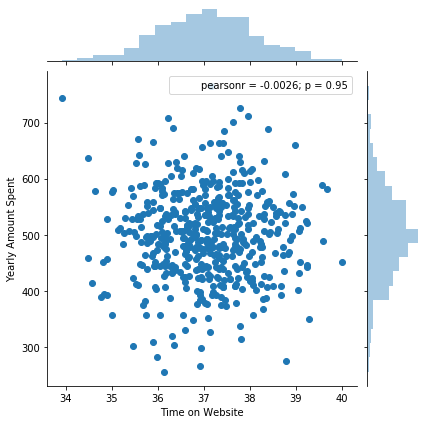

In [90]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = customers,stat_func = stat.pearsonr)
plt.show()

** Replacing the Time on Website with the Time on App column instead. **

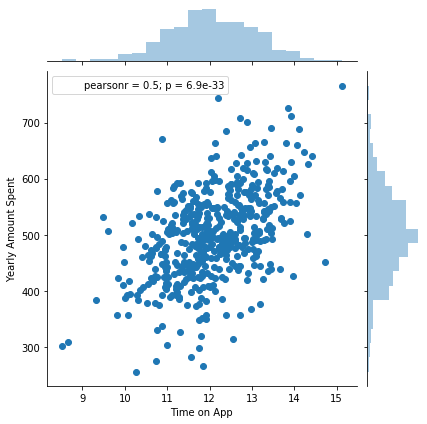

In [91]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers, stat_func = stat.pearsonr)
plt.show()

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

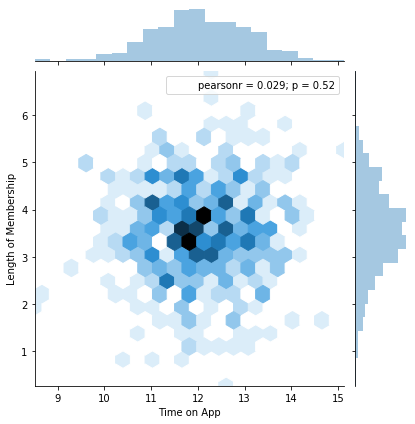

In [92]:
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = customers, kind = 'hex',stat_func = stat.pearsonr)
plt.show()

** Let's see how the data is distributed in the entire data set using pairplot.**

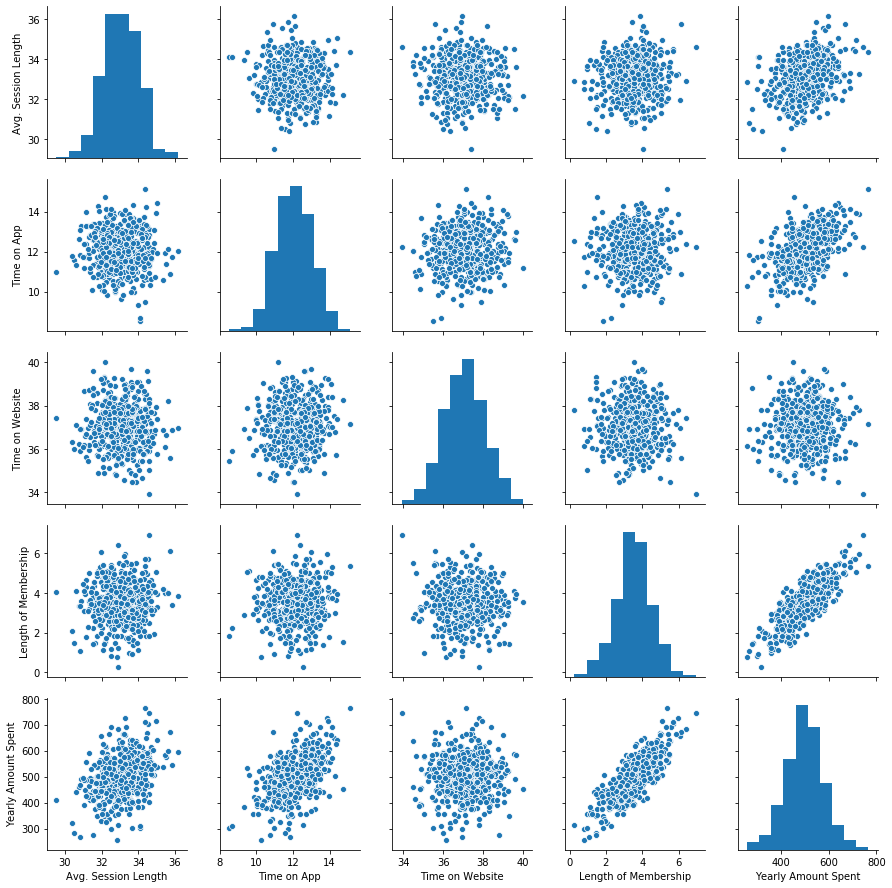

In [93]:
sns.pairplot(customers)
plt.show()

**Based on this plot it looks to be the most correlated feature with Yearly Amount Spent is Length of Membership**

**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

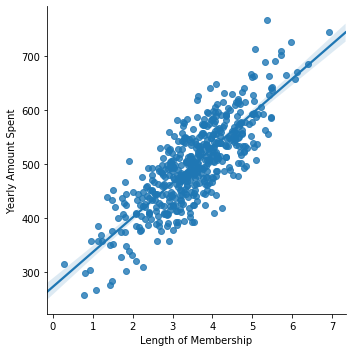

In [94]:
sns.lmplot(x = 'Length of Membership',y = 'Yearly Amount Spent',data = customers)
plt.show()

** The fig shows that higher the amount spent when the customer is having the membership for longer duration.**

## Training and Testing Data

** The variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
X = customers[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

## Training the Model

Now its time to train our model on our training data!

In [28]:
from sklearn.linear_model import LinearRegression

**Creating instance of a LinearRegression() model named lm.**

In [30]:
lm = LinearRegression()

** Training/fitting lm on the training data.**

In [31]:
print(lm.fit(X_train,y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


**Printing out the coefficients of the model**

In [32]:
print("Coefficients ",lm.coef_)

Coefficients  [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that model has been fitted, evaluating its performance by predicting off the test values!


In [33]:
pred_y = lm.predict(X_test)

** Creating a scatterplot of the real test values versus the predicted values. **

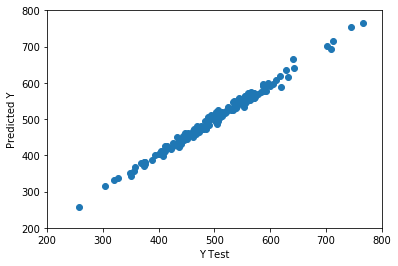

In [34]:
plt.scatter(y_test,pred_y)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.xlim([200,800])
plt.ylim([200,800])
plt.show()

## Evaluating the Model

Evaluating model performance by calculating the residual sum of squares and (R^2).

In [35]:
from sklearn import metrics
print("Mean Absolute Error", metrics.mean_absolute_error(y_test, pred_y))
print("Mean Squared Error", metrics.mean_squared_error(y_test, pred_y))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test, pred_y)))
print("R^2 value", metrics.r2_score(y_test, pred_y))

Mean Absolute Error 7.228148653430853
Mean Squared Error 79.81305165097487
Root Mean Squared Error 8.933815066978656
R^2 value 0.9890046246741233


## Residuals

**Plotting a histogram of the residuals and make sure it looks normally distributed.**

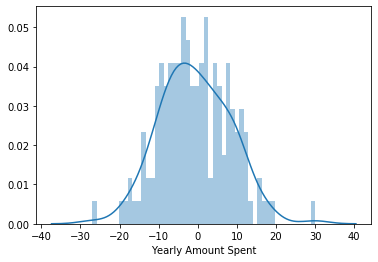

In [104]:
sns.distplot((y_test-pred_y), bins = 50)
plt.show()

## Conclusion
Finally, to figure out the answer to the original question, do the company need to focus their efforts on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [108]:
print(pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients']))

                      Coefficients
Avg. Session Length      25.981550
Time on App              38.590159
Time on Website           0.190405
Length of Membership     61.279097


**Do the company should focus more on their mobile app or on their website?**

* From the coefficients obtained, for 1 unit change in Length of Membership(other features constant) the yearly amount spent increases by 61.27 whereas the focus is to determine whether the company to focus on mobile app or website and it is clear the 1 unit change in Time on App(other features constant) the yearly amount spent by customers increases by 38.59 which is far more better than website.*

* Finally, the company should focus their efforts on Mobile App and not on the website.* 